# __Arquitectura de una Red Neuronal Artificial - MLP__

Vamos a entender las redes neuronales MLP con ejercicios prácticos.

## _Ejercicio 1_

Analicémos un problema de clasificación donde usamos datos tabulares.

#### Qué son los datos tabulares?

Son datos que estan almacenados en archivos tipo Excel, CSV, JSON, entre otros y que se pueden representar en tablas donde las columnas son las características, y las filas son las muestras o registros.

Vamos a usar la base de datos de [Diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) de la librería Scikit-Learn que esta conformada por datos tabulares.

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.target[:3]
diabetes.data.shape

(442, 10)

> La BD tiene 10 características y 442 registros

Vamos a cargar la BD en un formato tabular conocido como DataFrame para visualizar mejor la información.

In [2]:
import pandas as pd

df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


#### Cómo se pasa la información tabular a una red neuronal MLP?

En el siguiente esquema observamos cómo se hace.

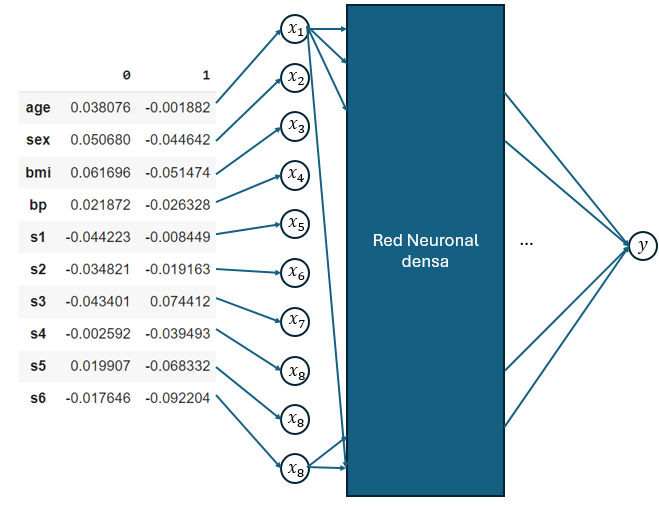

La capa de entrada de la red va a tener tantas neuronas como caractetísticas hayan en los datos tabulares. En este caso, la capa debe tener 10 neuronas que es la cantidad de características que contiene la BD.

## _Ejercicio 2_

Vamos a crear un modelo de clasificación para la base de datos <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits" target="_blank">MNIST dataset</a>, el cual es un conjunto de imágenes de números del 0 al 9 escritos a mano en escala de grises de 8x8. Pero primero, entendamos cómo se compone una imagen.

#### Como se estructura una imagen?

Las imágenes son arrays anidados con diferentes canales (cada canal representando un color diferente), en esta ocasión el único canal en el que vienen las imágenes es de la escala de grises, donde cada pixel puede encontrarse entre los valores de 0 a 255, siendo 0 el color negro y 255 el blanco.

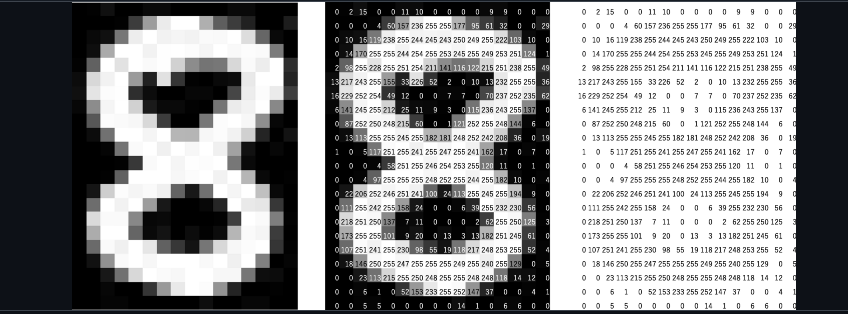

#### Carga y visualización de las imágenes

Vamos a cargar las librerías necesarias para subir las imágenes, visualizarlas y hacer operaciones matriciales con éstas.

In [3]:
# importar los datos
from sklearn.datasets import load_digits
# instanciamos el objeto que contiene los datos
digits = load_digits()
# mostrar dimensiones de la BD
print(digits.data.shape)

(1797, 64)


> La BD contiene 64 características (que en este caso son los pixeles) y 1797 registros o imágenes.

Mostramos la imagen correspondiente al registro con índice 23.

<Figure size 640x480 with 0 Axes>

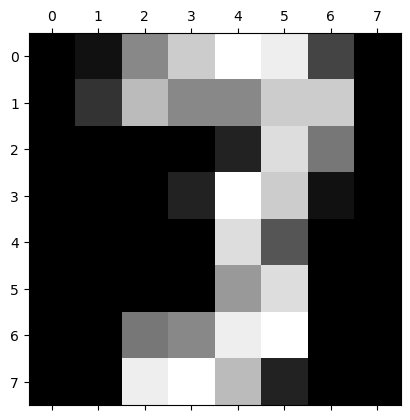

In [4]:
# importar la libreria para visualizar las imagenes
import matplotlib.pyplot as plt
plt.gray()
# mostrar la imagen contenida en el registro 23
plt.matshow(digits.images[23])
plt.show()

Mostramos los valores aplanados de la imagen 23 en forma de vector. Los valores corresponden a la escala de grises que manejan las imágenes.

In [5]:
digits.data[23]

array([ 0.,  1.,  8., 12., 15., 14.,  4.,  0.,  0.,  3., 11.,  8.,  8.,
       12., 12.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  7.,  0.,  0.,  0.,
        0.,  2., 15., 12.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,
        0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  7.,  8.,
       14., 15.,  0.,  0.,  0.,  0., 14., 15., 11.,  2.,  0.,  0.])

Verificamos el número al que corresponde la imagen con índice 23 mediante su etiqueta.

In [6]:
digits.target[23]

3

Ahora, tomemos otra imagen en este caso la de índice 100.

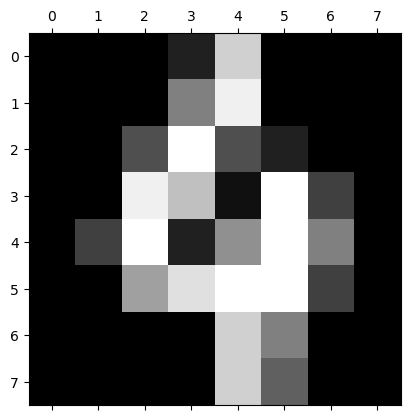

In [7]:
# mostrar la imagen contenida en el registro 100
plt.matshow(digits.images[100])
plt.show()

Mostramos los valores de cada pixel.

In [8]:
digits.data[100]

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

Verficamos la etiqueta que corresponde al registro 100.

In [9]:
digits.target[100]

4

Ahora, vamos a mostrar las primera 4 imágenes de la BD con su respectiva etiqueta.

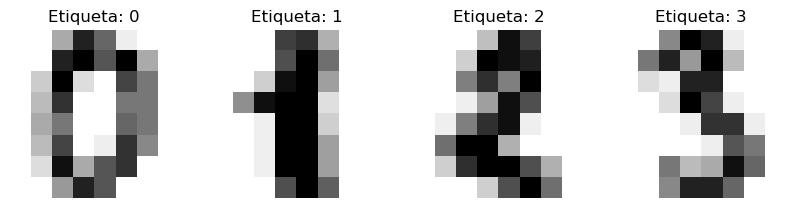

In [10]:
# figura con subgraficos de 1 fila y 4 columnas
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))

# itera sobre cada subgrafico y los datos
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off() # no mostrar las marcas ni los bordes 
    # imagen en escala de grises con nearest para mostrar pixeles sin suavizado
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') 
    ax.set_title('Etiqueta: %i' % label)


#### Cómo se ingresa la imagen a una red neuronal artificial? 

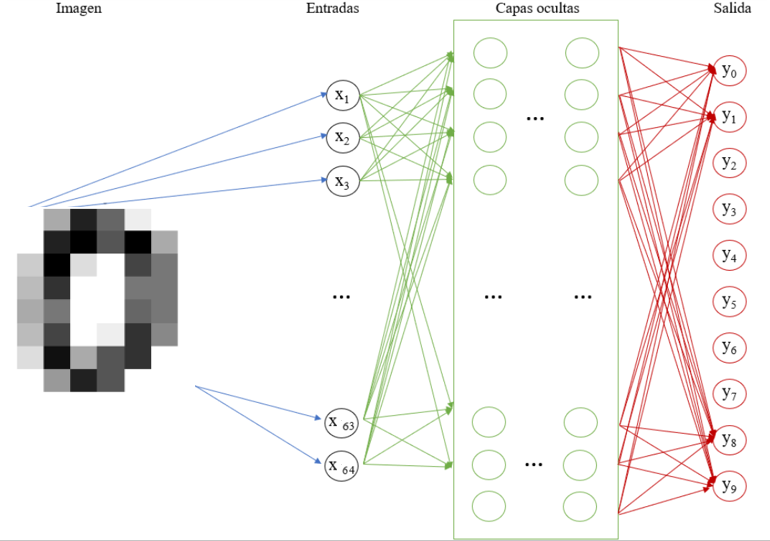

Como vimos antes, la imagen es una matriz 8x8 donde cada pixel equivale a una entrada, por lo tanto hay que convertir la matriz 8x8 en un vector de 64x1 y para esto usamos el método _reshape_.

Al redimensionarla, la imagen pasa de una matriz de dos dimensiones a una matriz unidimensional.

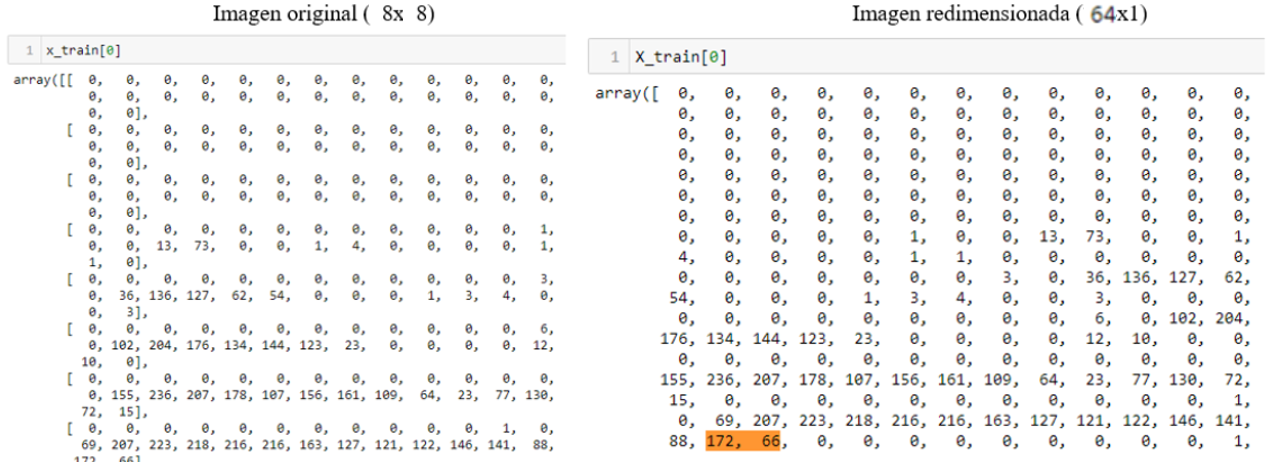

Veamos cómo hacerlo en Python.

In [11]:
# total de imagenes del dataset
n_samples = len(digits.images) 
n_samples

1797

Convertimos las imágenes 8x8 en vectores unidimensionales de 64 valores cada uno mediante el procesos de flatten.

In [12]:
# flatten de las imagenes
data = digits.images.reshape((n_samples, -1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

#### División de las imágenes en entrenamiento y prueba

Una vez aplanada las imágenes a una dimensión, las dividimos en grupos con el 50% para entrenamiento y 50% para prueba.

In [13]:
from sklearn.model_selection import train_test_split

# 50% para entrenamiento y 50% para prueba
X_train, X_test, y_train, y_test = train_test_split(
    data,
    digits.target,
    test_size=0.5,
    shuffle=False   # mantiene el orden de los datos
)

In [14]:
print('Tamaño del X_train: ', X_train.shape)
print('Tamaño del y_train: ', y_train.shape)
print('Tamaño del X_test: ', X_test.shape)
print('Tamaño del y_test: ', y_test.shape)

Tamaño del X_train:  (898, 64)
Tamaño del y_train:  (898,)
Tamaño del X_test:  (899, 64)
Tamaño del y_test:  (899,)


#### Estandarización de los datos de entrada

Es un requisito común para muchos estimadores de aprendizaje automático: es posible que se comporten mal si las características individuales no se parecen más o menos a los datos estándar distribuidos normalmente. (Ejemplo, gaussiana con media 0 y varianza unitaria).

En la estandarización, se aplica la siguiente fórmula a cada dato o muestra de entrada:

$$z\ =\frac {(x\ -\ u)} {s}$$

$x$ : la muestra.<br>
$u$ : la media de todas las muestras.<br>
$s$ : la desviación estándar de todas las muestras.<br>

Para este propósito, Scikit-Learn tiene implementado el método _StandarScaler()_.

In [15]:
from sklearn.preprocessing import StandardScaler

# instanciamos un objeto StandarScaler
scaler = StandardScaler()

# estandarizamos los datos de entrada con el objeto scaler
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test) 

#### Cómo obtener la salida en un formato adecuado?

Para obtener los datos de salida, se hace la transformación del vector de salida. Se usa el método _to_categorical()_ de keras, el cual convierte un vector de clase (enteros) en una matriz de clase binaria.

In [16]:
import tensorflow as tf
from keras.utils import to_categorical

y_trainOHE = to_categorical([0,1,2,3,4,5,6,7,8,9])
for i, ohe in enumerate(y_trainOHE):
    print(i, '=>' , ohe)

2024-12-04 11:20:31.442958: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-04 11:20:31.711050: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-04 11:20:31.711268: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-04 11:20:31.792697: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 11:20:31.962756: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-04 11:20:31.964138: I tensorflow/core/platform/cpu_feature_guard.cc:1

0 => [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 => [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2 => [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3 => [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
4 => [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
5 => [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
6 => [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
7 => [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
8 => [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
9 => [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Se hace la codificación también para los etiquetas tanto de entrenamiento como de prueba.

In [17]:
y_trainOHE = to_categorical(y_train)
y_testOHE = to_categorical(y_test)

# cantidad de clases del dataset
n_class = y_trainOHE.shape[1]
# mostrar numero de clases
print('Numero de clases: ', n_class)

Numero de clases:  10


Mostremos la representación de la clase 0 del conjunto train para verificar que la transformación se ha realizado correctamente.

In [18]:
print('Ejemplo de la salida de la muestra 0 del conjunto de train: ', y_trainOHE[0])

Ejemplo de la salida de la muestra 0 del conjunto de train:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Información de la matriz de entrada a la red neuronal

In [19]:
# dimension de entrada
input_dim = X_train.shape[1]
print('Dimension de entrada de la red: ', input_dim)
print('Tamano de las imagenes segun el dataset: ', 8*8)

Dimension de entrada de la red:  64
Tamano de las imagenes segun el dataset:  64


#### Definir la arquitectura de la Red Neuronal Artificial MLP

Ya que se tienen las matrices de entrada y salida, tanto para entrenamiento (_train_) como para prueba (_test_), se procede a definir la arquitectura de la red, entrenar y validar.

Hay varia formas de usar el método para la creación de una Red Neuronal Artificial en Python. Para efectos de este ejercicio vamos a crear dos redes sencillas para ejemplificar ambos métodos.

#### Modelo 1

Importamos los métodos implementados en Scikit-Learn para la creación de una red neuronal.

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Vamos a crear una red densa (_fully connected_) con __una capa interna de 32 neuronas__, donde la entrada será la imagen redimensionada anteriormente (__64,1__) y la __salida serán las 10 neuronas__ que contendrán la codificación __to_categorical()__ realizada en los pasos anteriores

In [21]:
model1 = Sequential([
    Dense(32, input_shape=(input_dim,)),
    Activation('tanh'),
    Dense(n_class),
    Activation('softmax')
])

In [22]:
# Resumen del modelo creado
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2080      
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 2410 (9.41 KB)
Trainable params: 2410 (9.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Entrenamiento del modelo 1

Una vez la arquitectura del modelo sea definida, el siguiente paso es configurar la función de pérdida y el optimizador. 

- Seleccionamos _categorical_crossentropy_ como función de perdida ya que es la adecuada para clasificación multiclase.

- Como optimizador utilizamos el descenso del gradiente estocástico (sgd).

In [23]:
model1.compile(loss='categorical_crossentropy', optimizer='sgd')

En el entrenamiento se aplica sólo una iteración sobre el conjunto de entrenamiento (1 época). Se usa un tamaño de lote para actualiza los pesos de 16. Además, se asigna el 10% de los datos de entrenamiento para la validación.

In [24]:
print('Entrenando...')
model1.fit(
    X_trainN, 
    y_trainOHE,
    epochs=1,
    batch_size=16,
    validation_split=0.1,
    verbose=2
    )

Entrenando...
51/51 - 1s - loss: 2.2385 - val_loss: 1.8774 - 840ms/epoch - 16ms/step


Los resultados se interpretan como sigue:

> 51/51: representa el número de lotes procesados durante cada época. En este caso se procesaron 51 lotes porque el conjunto de entrenamiento fue dividido en lotes de tamaño 16.

> loss: 2.3285. Es el valor de la función de pérdida calculada sobre los datos de entrenamiento después de la primera época.

> val_loss: 1.8774. Es el valor de la función de perdida en los datos de validación después de la época. Este valor disminuye con las epocas si el modelo aprende correctamente.

> Los valores de loss y val_loss son alto lo que indica que el modelo tiene un rendimiento inicial muy pobre.

#### Visualización de resultados Modelo 1

Ahora, vamos a obtener la predicción de la red para una muestra tomada de los datos de prueba y visualizar en un histograma la probabilidad predicha para cada clase en el conjunto de datos.

In [25]:
# selecciona la primera muestra del conjunto de prueba y la 
# reestructura como un vector para luego generar la prediccion 
preds = model1.predict(X_testN[0,:].reshape(1, input_dim), verbose=0)

# aplana la prediccion
performance = preds.flatten()

performance

array([0.03283074, 0.30465555, 0.13731876, 0.02137093, 0.06890697,
       0.12442436, 0.14112066, 0.07908019, 0.0336054 , 0.05668638],
      dtype=float32)

In [26]:
# guardamos las etiquetas de las clases en una lista
objects = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# reversamos para que se alinee con la visualizacion
objects.reverse()

objects

['9', '8', '7', '6', '5', '4', '3', '2', '1', '0']

In [27]:
import numpy as np

# generamos un rango de posiciones para las etiquetas
y_pos = np.arange(n_class)

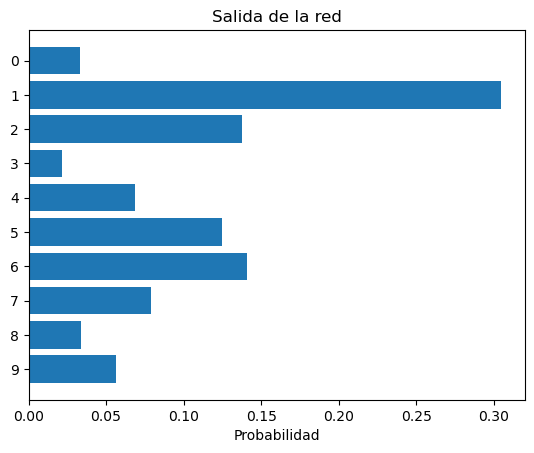

In [28]:
# creamos el histograma
plt.barh(y_pos[::-1], performance, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Probabilidad')
plt.title('Salida de la red')
plt.show()

> El gráfico indica que la muestra tiene una mayor probabilidad de pertenecer a la clase 1 con un 30%.

> También existe una probabilidad alta que sea de la clase 2, 5 o 6.

> El gráfico ayuda a interpretar la salida de la red, mostrando no sólo la predicción más probable sino también el grado de confianza de cada clase.

Verifiquemos a qué clase pertenece realmente la muestra tomada para la predicción. Para ello, tomamos el primer elemento codificado con One Hot que corresponde al primer ejemplo del conjunto de prueba.

In [29]:
y_testOHE[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

Indica que corresponde a la clase 8.

Ahora, veriquemos el contenido de la primera muestra normalizada del conjunto de datos de prueba _X_testN_

In [30]:
X_testN[0]

array([ 0.        , -0.30649137, -0.79630624, -0.05364725,  0.51451103,
        1.57709986,  0.38448848, -0.14511691, -0.03338903, -0.24839464,
        0.52071545,  0.95379286,  0.22422598,  1.23800278,  1.45375671,
       -0.15053471, -0.03338903,  1.56238796,  1.06262456, -0.51437389,
       -0.2096369 ,  1.28532526,  0.96968585, -0.1078935 , -0.03338903,
        0.81462953,  0.90606923,  0.37443532,  0.47023429,  1.06416004,
       -0.60221254, -0.03338903,  0.        , -0.6926876 , -0.97906833,
        0.41527306,  0.92991437,  0.73712192, -0.78187919,  0.        ,
       -0.05104053, -0.57132314, -1.09636396,  0.89349174,  1.29597603,
        1.30882266,  0.72825469, -0.05789607, -0.0503716 , -0.39317674,
       -1.33630352,  1.21386238,  1.23167773,  1.19976258,  0.78919026,
       -0.17286489, -0.03338903, -0.28912275, -1.01469249, -0.15967563,
        0.25814478,  0.88375899, -0.25548496, -0.17343117])

Vamos a visualizar la imagen del conjunto de datos de prueba _X_testN_ y mostrar su etiqueta correspondiente como titulo

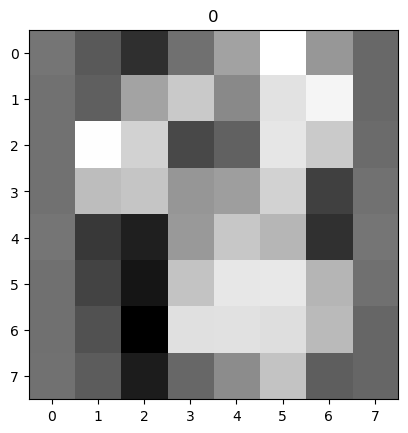

In [31]:
fig, ax = plt.subplots()
ax.imshow(X_testN[0].reshape(8,8), cmap='gray')
ax.set_title(y_train[0])
plt.show()

> La etiqueta coincide con la imagen que es el digito cero.

> A pesa que el modelo predice que se trata del digito 1 con una certeza del 30%, la realidad es que se trata del digito 0, lo cual habla del bajo rendimiento del modelo.

Veamos el vector de predicción que se trata de la salida del modelo.

In [32]:
preds[0]

array([0.03283074, 0.30465555, 0.13731876, 0.02137093, 0.06890697,
       0.12442436, 0.14112066, 0.07908019, 0.0336054 , 0.05668638],
      dtype=float32)

In [33]:
preds[0]*100

array([ 3.2830744, 30.465555 , 13.731876 ,  2.1370935,  6.890697 ,
       12.442436 , 14.112065 ,  7.9080195,  3.3605397,  5.6686378],
      dtype=float32)

Aca vemos que la mayor probabilidad es para la clase 1 seguida de la clase 6. Sin embargo, ninguna de las dos es la acertada.

Veamos las 5 clases más probables predichas por el modelo utilizando todas las muestras del conjunto de prueba

In [34]:
preds = model1.predict(X_testN, verbose=0)
classes = np.argmax(preds, axis=1)
classes[:5]

array([1, 7, 9, 9, 6])

> Vemos que las clases con mayor pobabilidad de prediccion son: 1, 6, 7 y 9.

#### Modelo 2

Importamos las librerias que se van a utilizar

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Para este modelo, crearemos una red densa con dos capas internas de 64 y 32 neuronas, donde la entrada sera la imagen redimensionada anteriormente (64, 1) y la salida seran las 10 neuronas que contendra la codificacion _to_categorical_ realizada anteriormente

In [36]:
model2 = Sequential()
model2.add(Dense(64, input_dim=input_dim, name='Capa_oculta_1'))
model2.add(Activation('tanh', name='tanh1'))
model2.add(Dense(32, name='Capa_oculta_2'))
model2.add(Activation('tanh', name='tanh2'))
model2.add(Dense(n_class, activation='softmax', name='Capa_Salida'))

In [37]:
# resumen de la arquitectura del modelo 2
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_oculta_1 (Dense)       (None, 64)                4160      
                                                                 
 tanh1 (Activation)          (None, 64)                0         
                                                                 
 Capa_oculta_2 (Dense)       (None, 32)                2080      
                                                                 
 tanh2 (Activation)          (None, 32)                0         
                                                                 
 Capa_Salida (Dense)         (None, 10)                330       
                                                                 
Total params: 6570 (25.66 KB)
Trainable params: 6570 (25.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Entrenamiento del Modelo 2

Utilizamos la misma funcion de perdida (_categorical_crossentropy_) y optimizador (_sgd_) del modelo anterior, por lo que la unica diferencia sera la nueva capa de 32 neuronas

In [38]:
model2.compile(loss='categorical_crossentropy', optimizer='sgd')

Vamos a aplicar 10 iteraciones sobre los datos de entrenamiento, es decir, 10 epocas. Tambien utilizamos el mismo _batch_size_ de 16 e igual cantidad de datos de entrenamiento para la validacion.

In [39]:
print('Entrenando modelo 2')
model2.fit(
    X_trainN, 
    y_trainOHE, 
    epochs=10, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=2
    )

Entrenando modelo 2
Epoch 1/10
51/51 - 1s - loss: 2.1398 - val_loss: 1.7760 - 802ms/epoch - 16ms/step
Epoch 2/10
51/51 - 0s - loss: 1.4725 - val_loss: 1.3571 - 155ms/epoch - 3ms/step
Epoch 3/10
51/51 - 0s - loss: 1.1323 - val_loss: 1.1147 - 155ms/epoch - 3ms/step
Epoch 4/10
51/51 - 0s - loss: 0.9227 - val_loss: 0.9566 - 158ms/epoch - 3ms/step
Epoch 5/10
51/51 - 0s - loss: 0.7783 - val_loss: 0.8428 - 167ms/epoch - 3ms/step
Epoch 6/10
51/51 - 0s - loss: 0.6718 - val_loss: 0.7536 - 155ms/epoch - 3ms/step
Epoch 7/10
51/51 - 0s - loss: 0.5896 - val_loss: 0.6887 - 155ms/epoch - 3ms/step
Epoch 8/10
51/51 - 0s - loss: 0.5238 - val_loss: 0.6304 - 158ms/epoch - 3ms/step
Epoch 9/10
51/51 - 0s - loss: 0.4707 - val_loss: 0.5865 - 170ms/epoch - 3ms/step
Epoch 10/10
51/51 - 0s - loss: 0.4268 - val_loss: 0.5482 - 226ms/epoch - 4ms/step


>  La pérdida disminuye constantemente desde 1.9437 en la primera época hasta 0.4180 en la última época. Esto indica que el modelo está aprendiendo efectivamente.

> La val_loss también disminuye de 1.4877 a 0.4447 a lo largo de las épocas, lo que indica que el modelo está mejorando su desempeño en datos no vistos.

> Es importante que tanto loss como val_loss disminuyan de forma similar. Si el val_loss empezara a aumentar mientras el loss sigue disminuyendo, sería un indicio de sobreajuste. En este caso, la disminución consistente en ambas métricas sugiere que el modelo aún no está sobreajustando y generaliza bien.

#### Visualizacion de los resultados del Modelo 2

Vamos a obtener la prediccion de la red para una muestra tomada de los datos de prueba y visualizar en un histograma la probabilidad predicha para cada clase en el conjunto de datos.

In [40]:
# selecciona la primera muestra del conjunto de prueba y la 
# reestructura como un vector para luego generar la prediccion
preds = model2.predict(X_testN[0,:].reshape(1, input_dim), verbose=0)

performance = preds.flatten()
performance

array([0.08028556, 0.07788306, 0.02310963, 0.05143823, 0.01223836,
       0.22748162, 0.01738604, 0.01570861, 0.14786789, 0.3466011 ],
      dtype=float32)

In [41]:
# guardamos las etiquetas de las clases en una lista
objects = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# reversamos para que se alinee con la visualizacion
objects.reverse()

objects

['9', '8', '7', '6', '5', '4', '3', '2', '1', '0']

In [42]:
y_pos = np.arange(n_class)
y_pos

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

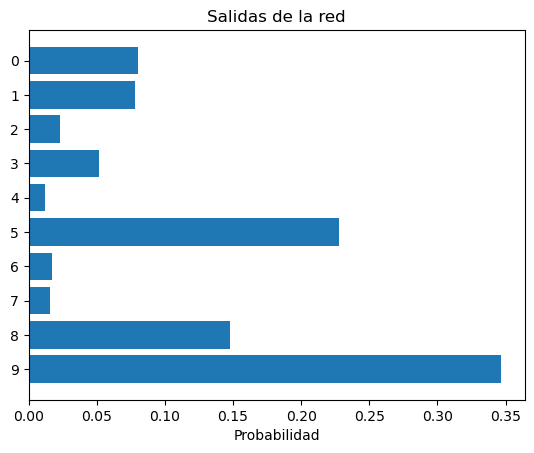

In [43]:
plt.barh(y_pos[::-1], performance, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Probabilidad')
plt.title('Salidas de la red')
plt.show()

Visualizamos el vector de salida en porcentajes

In [44]:
preds[0]*100

array([ 8.028557 ,  7.7883058,  2.3109627,  5.1438236,  1.223836 ,
       22.748161 ,  1.738604 ,  1.5708612, 14.786789 , 34.66011  ],
      dtype=float32)

Veamos las 5 clases mas probables predichas por el modelo utilizando todas las muestras del conjunto de prueba

In [45]:
preds = model2.predict(X_testN, verbose=0)
classes = np.argmax(preds, axis=1)
classes[:5]

array([9, 3, 6, 9, 0])

## _Ejercicio 3_

Crear un modelo de clasificación para la base de datos <a href="https://github.com/zalandoresearch/fashion-mnist" target="_blank">Fashion-MNIST dataset</a>, el cual es un conjunto de imágenes de ropa en escala de grises de 28x28. Es más complejo que MNIST, por lo que es una mejor representación del rendimiento real de su red.

#### Importar librerias

Se cargan las librerías de interés para visualizar las imágenes y hacer operaciones matriciales con estas.

Existe una librería de IA que se llama __Tensorflow__ que sirve para crear y entrenar redes neuronales artificiales, creada por Google. <a href="https://www.tensorflow.org/" targer="_blank">Link</a>

In [4]:
# libreria para construir y entrenar redes
import tensorflow as tf
# clases para definir modelos con capas apiladas linealmente
from tensorflow.keras.models import Sequential
# capas de red neuronal totalmente conectadas y aplanadas
from tensorflow.keras.layers import Dense, Flatten
# Base de datos de Fashion MNIST
from tensorflow.keras.datasets import fashion_mnist
# Metodo para convertir etiquetas numericas en formato OHE
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

#### Cargar Datos

Para usar la base de datos Fashion-MNIST, la descargamos desde la misma librería __Tensorflow__ desde su módulo de __datasets__. <a href="https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data" target="_blank">Link</a>. En esta página está la documentación de la base de datos y la forma de usarla.

Esta base de datos contiene 10 clases etiquetadas como se muestra a continuación.

<table align="left">
    <tr><td>Label</td><td>Description</td></tr>
    <tr><td>0</td><td>T-shirt/top</td></tr>
    <tr><td>1</td><td>Trouser</td></tr>
    <tr><td>2</td><td>Pullover</td></tr>
    <tr><td>3</td><td>Dress</td></tr>
    <tr><td>4</td><td>Coat</td></tr>
    <tr><td>5</td><td>Sandal</td></tr>
    <tr><td>6</td><td>Shirt</td></tr>
    <tr><td>7</td><td>Sneaker</td></tr>
    <tr><td>8</td><td>Bag</td></tr>
    <tr><td>9</td><td>Ankle boot</td></tr>
</table>

Descarga de las imágenes y asignación a variables para entrenamiento (_train_) y prueba (_test_).

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Ejemplos de las imágenes que se cargan de la base de datos.

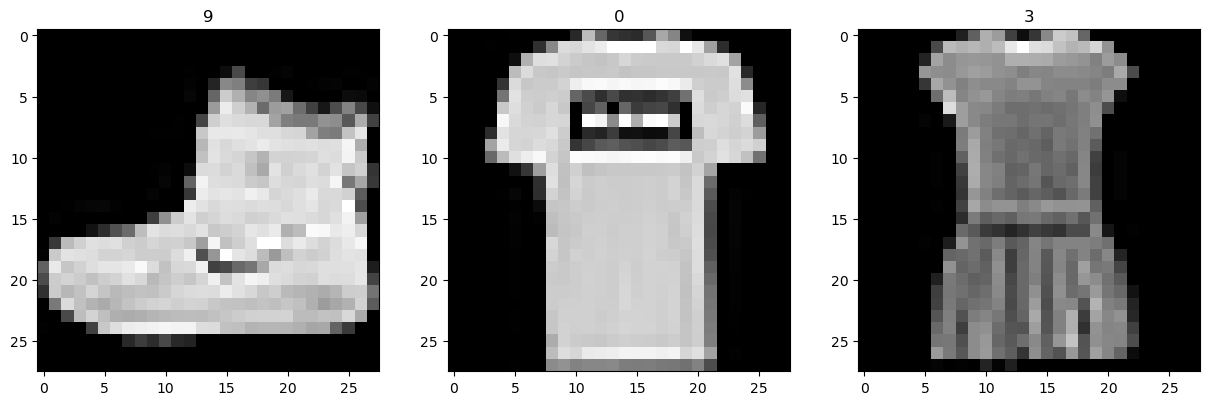

In [6]:
fig, ax = plt.subplots(1,3 , figsize=(15,8))

# imagen contenida en el registro 0
ax[0].imshow(x_train[0,:,:], cmap='gray')
ax[0].set_title(y_train[0])
# imagen contenida en el registro 1
ax[1].imshow(x_train[1,:,:], cmap='gray')
ax[1].set_title(y_train[1])
# imagen contenida en el registro 3
ax[2].imshow(x_train[3,:,:], cmap='gray')
ax[2].set_title(y_train[3])
plt.show()

> Las imagenes se muestran con su respectiva etiqueta

- Imagen 0 corresponde a la etiqueta 9 (Botin)

- Imagen 1 corresponde a la etiqueta 0 (Camisa)

- Imagen 3 corresponde a la etiqueta 3 (Vestido)

#### Normalizar las imagenes

Convertimos los valores de píxeles de 0-255 a 0-1 para mejorar el entrenamiento.

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#### Codificar etiquetas

Para tener los datos de salida en un formato adecuado, se hace la transformación del vector de salida. Se usa el método _to_categorical()_ de keras, el cual convierte un vector de clase (enteros) en una matriz de clase binaria

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Obtenemos la cantidad de clases 

In [9]:
n_class = y_train.shape[1]
n_class

10

#### Generadores de datos

La siguiente funcion es fundamental para optimizar memoria y entrenar modelos con cojuntos de datos grandes sin saturar la RAM. Crea lotes de datos de forma eficiente mezclando los indices en cada iteracion. Los lotes son de un tamano definido y se usa la funcion _yield_ para no cargar todo en memoria.

In [10]:
def data_generator(X, y, batch_size=64):
    """Generador de datos que hace uso eficiente de la memoria
    X: imagenes
    y: etiquetas
    batch_size: tamano de los lotes por iteracion
    """

    # numero total de muestras
    dataset_size = len(X)
    # tensor que contiene los indices de las muestras
    indices = tf.range(dataset_size)
    
    # bucle que se detiene manualmente o hasta que el entrenamiento finaliza
    while True:
        # baraja los indices de la muestra aleatoriamente
        indices = tf.random.shuffle(indices)
        
        # generacion de lotes
        for start in range(0, dataset_size, batch_size):
            # define un lote en cada inicio
            batch_indices = indices[start:start + batch_size]
            # recupera las muestras y etiquetas usando los indices
            X_batch = tf.gather(X, batch_indices)
            y_batch = tf.gather(y, batch_indices)
            # devuelve el lote actual de datos y etiquetas
            yield X_batch, y_batch

#### Arquitectura de la red MLP

Creamos una red densa (fully connected) con dos capas interna de 64 y 32 neuronas, donde la entrada será la imagen redimensionada anteriormente (784,1) y la salida serán las 10 neuronas que contendrán la codificación _to_categorical()_ realizada en los pasos anteriores

In [11]:
model = Sequential([
    # Aplana las imágenes de 28x28x1 a vectores de 784
    Flatten(input_shape=(28, 28, 1)),
    # Primera capa con 64 neuronas 
    Dense(64, activation='tanh'), 
    # Primera capa con 32 neuronas 
    Dense(32, activation='tanh'),  
    # Capa de salida con 10 clases  
    Dense(n_class, activation='softmax')  
])

# resumen de la arquitectura
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compilamos el modelo. Para ello, utilizamos un optimizador _Adam_, como funcion de perdida la funcion _categorical_crossentropy_ y como metrica de error el _Accuracy_.

In [12]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
    )


#### Creacion de generadores

Genera lotes para el entrenamiento y la prueba

In [13]:
train_generator = data_generator(x_train, y_train)
test_generator = data_generator(x_test, y_test)

#### Entrenamiento del modelo

- Para el entrenamiento, se determina el numero de pasos por epoca (_step_per_epoch_): Total de datos / Tamano del lote.

- Tambien se determina el numero de pasos para validar (_validation_step_): Total de datos de validacion / Tamano del lote.

- Para no alargar el entrenamiento, utilizamos dos epocas

In [14]:
model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // 64,
    validation_data=test_generator,
    validation_steps=len(x_test) // 64,
    epochs=2
)


2024-12-05 08:12:47.471673: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.


Epoch 1/2
  1/937 [..............................] - ETA: 53:56 - loss: 2.5896 - accuracy: 0.0000e+00

2024-12-05 08:12:55.508584: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.


  2/937 [..............................] - ETA: 3:58 - loss: 2.4489 - accuracy: 0.0859     

2024-12-05 08:12:56.028579: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.


  3/937 [..............................] - ETA: 4:01 - loss: 2.3420 - accuracy: 0.1667

2024-12-05 08:12:56.296054: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.
2024-12-05 08:12:56.565529: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.


937/937 [==============================] - 183s 192ms/step - loss: 0.5317 - accuracy: 0.8199 - val_loss: 0.4513 - val_accuracy: 0.8396
Epoch 2/2
937/937 [==============================] - 265s 283ms/step - loss: 0.3819 - accuracy: 0.8633 - val_loss: 0.4210 - val_accuracy: 0.8448


> Tanto la perdida como la precision mejoraron entre las epocas lo que muestra que el modelo esta aprendiendo y ajustandose correctamente a los datos.

> La precision de validacion (0.84) es menor que la de entrenamiento (0.86) pero estan muy cerca. Esto indica qye no hay sobreajuste.

> Una precision de validacion del 84% despues de dos epocas es un resultado aceptable especialmente en tareas de clasificacion multiclase. Se debe probas con mas epocas para ver si mejora la precision aun mas.

Evaluamos el modelo con datos de prueba e imprimimos el Accuracy en porcentaje.

In [15]:
test_loss, test_accuracy = model.evaluate(
    test_generator, 
    steps=len(x_test) // 64
)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

156/156 [==============================] - 4s 25ms/step - loss: 0.4216 - accuracy: 0.8443
Test Accuracy: 84.43%


Obtenemos las predicciones del modelo para el conjunto de prueba. Solo predecimos para la primera imagen

In [25]:
preds = model.predict(x_test[:1], verbose=0) 
# Aplanar el array para facilitar el manejo 
predicted_probs = preds.flatten()  

#### Visualizacion de resultados

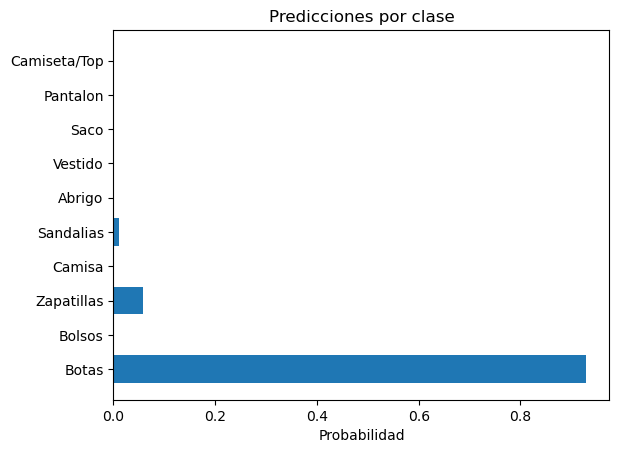

In [26]:
import numpy as np
import matplotlib.pyplot as plt



# Clases de Fashion MNIST
class_labels = [
    "Camiseta/Top", "Pantalon", "Saco", "Vestido", "Abrigo",
    "Sandalias", "Camisa", "Zapatillas", "Bolsos", "Botas"
]

# Crear el histograma
plt.barh(range(10), predicted_probs, align='center')
plt.yticks(range(10), class_labels)
plt.xlabel('Probabilidad')
plt.title('Predicciones por clase')
plt.gca().invert_yaxis()  # Invertir el eje Y para mejor visualización
plt.show()


> La grafica muestra que el modelo predice una mayor probabilidad de que sea una bota. Sin embargo, tambien predice con menor probabilidad que se trata de unas zapatillas o sandalias. No es perfecto.

Verifiquemos lo que contiene la imagen mostrandola junto a su respectiva etiqueta.

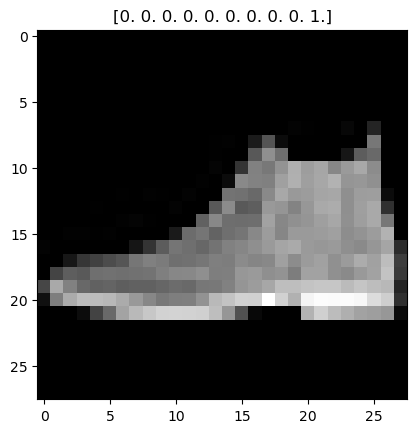

In [27]:
fig, ax = plt.subplots()
ax.imshow(x_test[0,:,:], cmap='gray')
ax.set_title(y_train[0])
plt.show()

> Efectivamente se trata de una bota, lo podemos verificar con el vector etiqueta.

Veamos el vector de prediccion

In [19]:
preds[0]

array([1.8528334e-04, 4.6961900e-04, 5.0942303e-04, 3.1428941e-04,
       2.3997255e-04, 1.0897435e-02, 5.8567751e-04, 5.7437606e-02,
       9.0662384e-04, 9.2845410e-01], dtype=float32)

Al multiplicar por 100 los valores del vector obtenemos las probabilidades en porcentaje para cada clase.

In [20]:
preds[0]*100

array([1.8528333e-02, 4.6961900e-02, 5.0942302e-02, 3.1428941e-02,
       2.3997255e-02, 1.0897435e+00, 5.8567751e-02, 5.7437606e+00,
       9.0662383e-02, 9.2845413e+01], dtype=float32)

Claramente vemos que el modelo predice con un 92% de precision que se trata de unas botas. Tambien predice con un 5.8% que se trata de unas zapatillas y con un 1.08% que se tratan de unas sandalias.